<a href="https://colab.research.google.com/github/Hanz-Zoe/tcc/blob/Colab/object_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow
#!pip install keras
#!pip install opencv-python

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import *
from keras.models import load_model
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2, time, os
from tensorflow.python.keras.utils.data_utils import get_file

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 1280)              410208    
                                                                 
 sequential_3 (Sequential)   (None, 5)                 128600    
                                                                 
Total params: 538808 (2.06 MB)
Trainable params: 524728 (2.00 MB)
Non-trainable params: 14080 (55.00 KB)
_________________________________________________________________


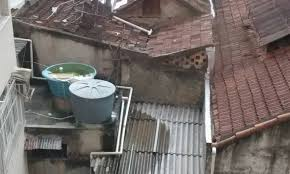

(1, 224, 224, 3)
1/1 [==============================] - 1s 1s/step
Model is not outputing the correct number of detection boxes


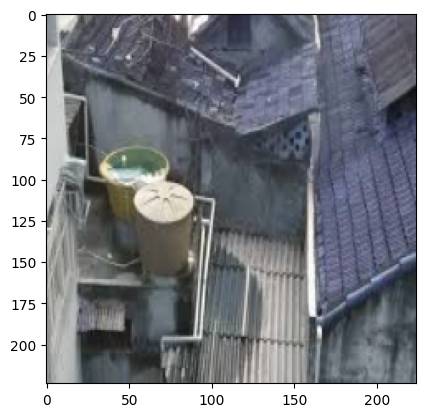

Class: Caixa d'água
Confidence Score: 59 %


In [ ]:
from keras.models import load_model  # TensorFlow is required for Keras to work
import cv2  # Install opencv-python
import numpy as np
from google.colab.patches import cv2_imshow

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model

model = load_model("/content/Model/keras_model.h5", compile=False)
model.summary()

# Load the labels
class_names = open("/content/Model/labels.txt", "r").readlines()

# CAMERA can be 0 or 1 based on default camera of your computer
image = cv2.imread("/content/Assets/1.jpg")
cv2_imshow(image)
cv2.waitKey(0)


#while True:
    # Grab the webcamera's image.
    # ret, image = image.read()

    # Resize the raw image into (224-height,224-width) pixels

image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)

    # Show the image in a window
#cv2.imshow("Webcam Image", image)

    # Convert the image to a numpy array and reshape it to the model's input shape
image_array = np.asarray(image, dtype=np.float32).reshape(1, 224, 224, 3)

print(image_array.shape)
    # Normalize the image array
image = (image_array / 127.5) - 1

    # Predicts the model
prediction = model.predict(image_array)

#builds the detection boxes
detection_boxes = prediction[0]

if detection_boxes is None:
  print("no objects detected in the image")
if detection_boxes.shape[0]!= 4:
  print("Model is not outputing the correct number of detection boxes")
else:
  for box in detection_boxes:
    x1, y1, x2, y2 = box
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

image = cv2.imread("/content/Assets/1.jpg")
image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)
image = image.reshape((224, 224, 3))  # Reshape to (height, width, channels)
plt.imshow(image)
plt.show()


index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", str(np.round(confidence_score * 100))[:-2], "%")

# Listen to the keyboard for presses.
keyboard_input = cv2.waitKey(1)

    # 27 is the ASCII for the esc key on your keyboard.
  #if keyboard_input == 27:
   # break


In [ ]:

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("Model/keras_model.h5", compile=False)

# Load the labels
class_names = open("/content/Model/labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("/content/Assets/DSCN2145.jpg").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)

1/1 [==============================] - 1s 976ms/step
Class: Caixa d'água
Confidence Score: 0.48043722


In [ ]:
#Fixing numpyseeds
np.random.seed(123)

#start building the classes for object detection
class Detector:
  def __init__(self):
    pass

  def readClasses(self, classesFilePath):
    with open(classesFilePath, 'r') as f:
      self.classesList = f.read().splitlines()

      #colors list
      self.colorList = np.random.uniform(low=0, high=255, size=(len(self.classesList), 3))

      print(len(self.classesList), len(self.colorList))

In [ ]:
from Detector import *

model = load_model("/content/Model/keras_model.h5", "r").readlines()
Detector = Detector()

# Nova seção